# Quantum Computing Assignment: Grover's Algorithm with Teleportation

In this assignment, you will create a 12-qubit quantum circuit that implements Grover's search algorithm. The objective is to use Grover's algorithm on the first 4 qubits to search for the state `0010`. After applying the Grover oracle and diffuser once, you will use a quantum teleportation protocol to transfer the state of these 4 qubits, with the help of the next 4 qubits, to the last 4 qubits. Then, you will apply the oracle and diffuser again to the last 4 qubits to search for the same state `0010`. The final result will be simulated using a noisy environment under depolarizing noise.

You are provided with an outline of the circuit that you should build, as shown below:

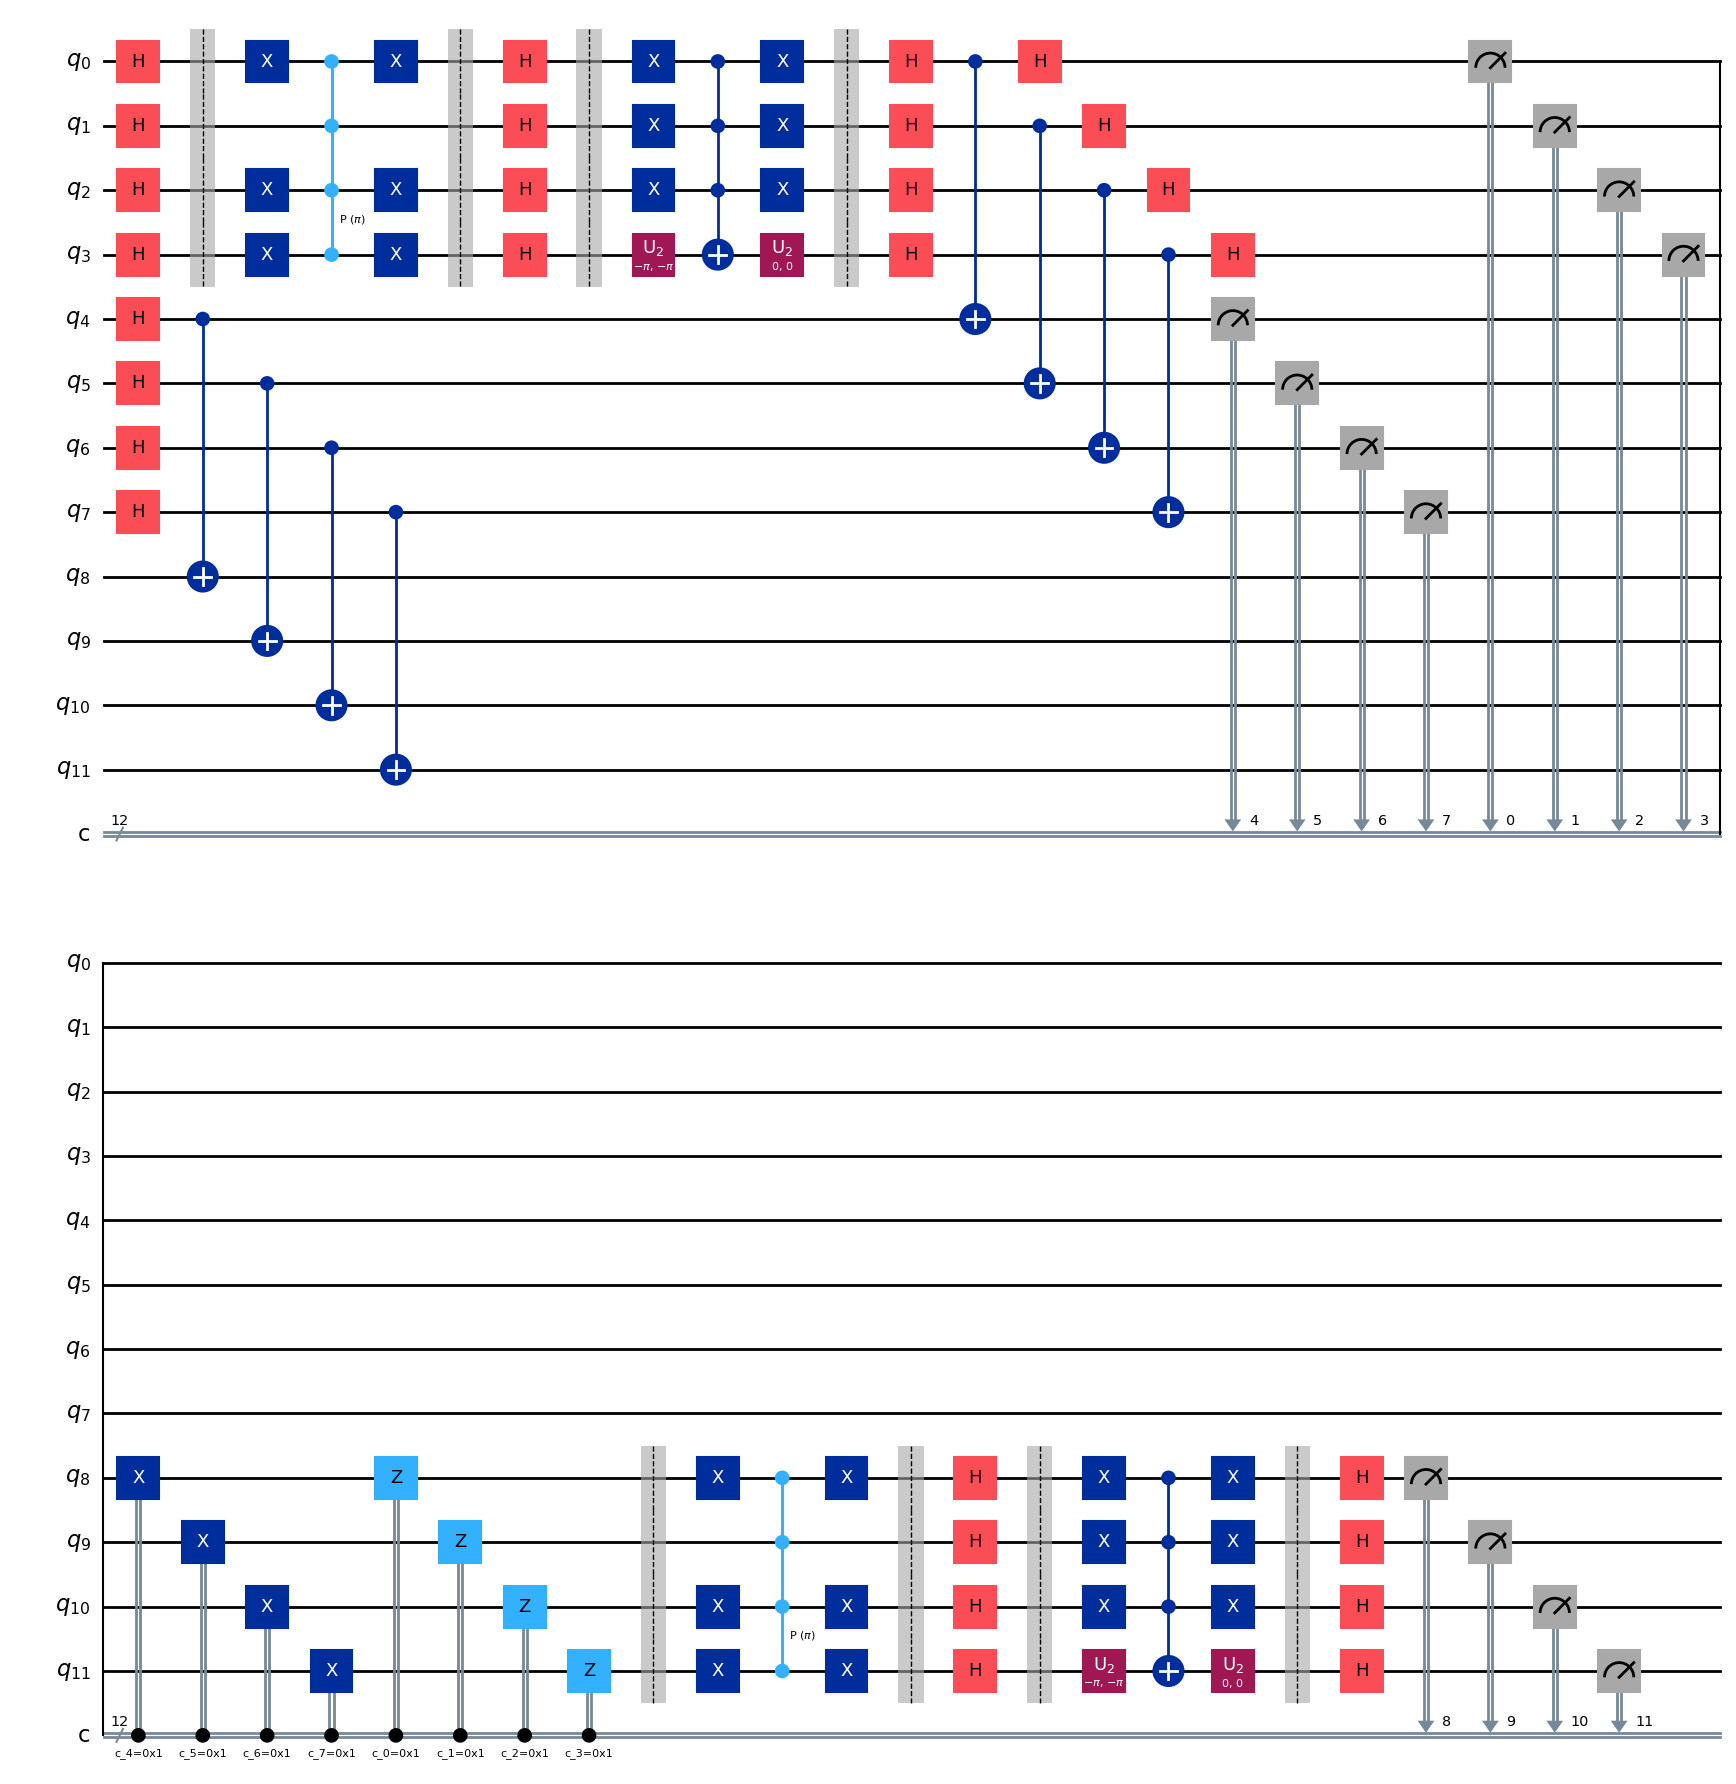

You will use the following steps to complete the task:

### Steps:

1. **Initialize a 12-qubit circuit**.
2. **Use `GroverOperator` to simplify Grover's algorithm**:
    - Import `GroverOperator` from `qiskit.circuit.library`.
    - Use the code below to define the oracle for the state `0010`
```python
mark_state = QuantumCircuit(4)
mark_state.x([0, 2, 3])
mark_state.mcp(pi, list(range(3)), 3)
mark_state.x([0, 2, 3])
```
    - Use `GroverOperator` to automatically generate a Grover operator.
    - Apply the Grover operator on the first 4 qubits once.
3. **Use the next 4 qubits as ancillae** to teleport the state of the first 4 qubits to the last 4 qubits.
    - Apply the quantum teleportation protocol between the first 4 qubits and the last 4 qubits.
4. **Apply the GroverOperator again** on the last 4 qubits to search for `0010`.
5. **Simulate the entire process** using the Aer simulator under depolarizing noise and retrieve the result of the last 4 qubits.

### Noise Model Hint

The noise model should include depolarizing noise for different types of gates with the following probabilities:

- 1-qubit gates: `0.001`
- 2-qubit gates: `0.01`
- 4-qubit gates: `0.1`

You can implement this noise model using Qiskit's noise module as shown below:

```python
# Create depolarizing errors for different gate types
error1 = noise.depolarizing_error(prob_1, 1)
error2 = noise.depolarizing_error(prob_2, 2)
error3 = noise.depolarizing_error(prob_3, 4)

# Add quantum errors according to the gates exist in the circuit
noise_model.add_all_qubit_quantum_error(error1, ['h', 'u2', 'x', 'z'])  # 1-qubit gates
noise_model.add_all_qubit_quantum_error(error2, ['cx'])  # 2-qubit gates
noise_model.add_all_qubit_quantum_error(error3, ['mcp', 'mcx'])  # 4-qubit gates
```

The outcome should be the same if you put 42 as the Aer's seed:

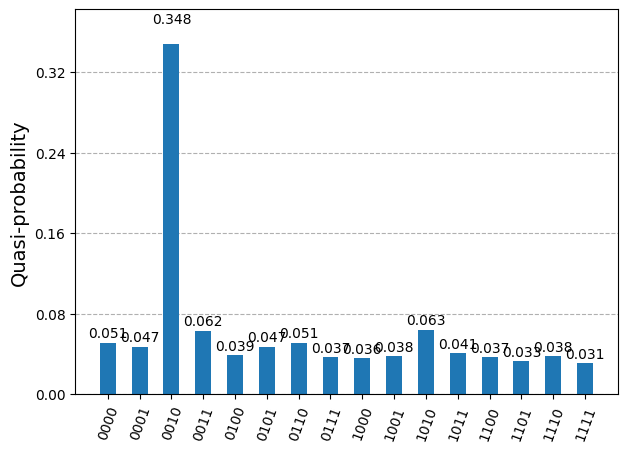

# My Answer ex3 ⚡

## Step 1: install packages

In [1]:
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install qiskit-aer

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=f856c4f7803bc9f66021b044b321278399bff8354f8e03ba470c6e81b3c06cee
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built py

## Step 2: import Liborary

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import GroverOperator
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
from math import pi


## Step 3: main Code

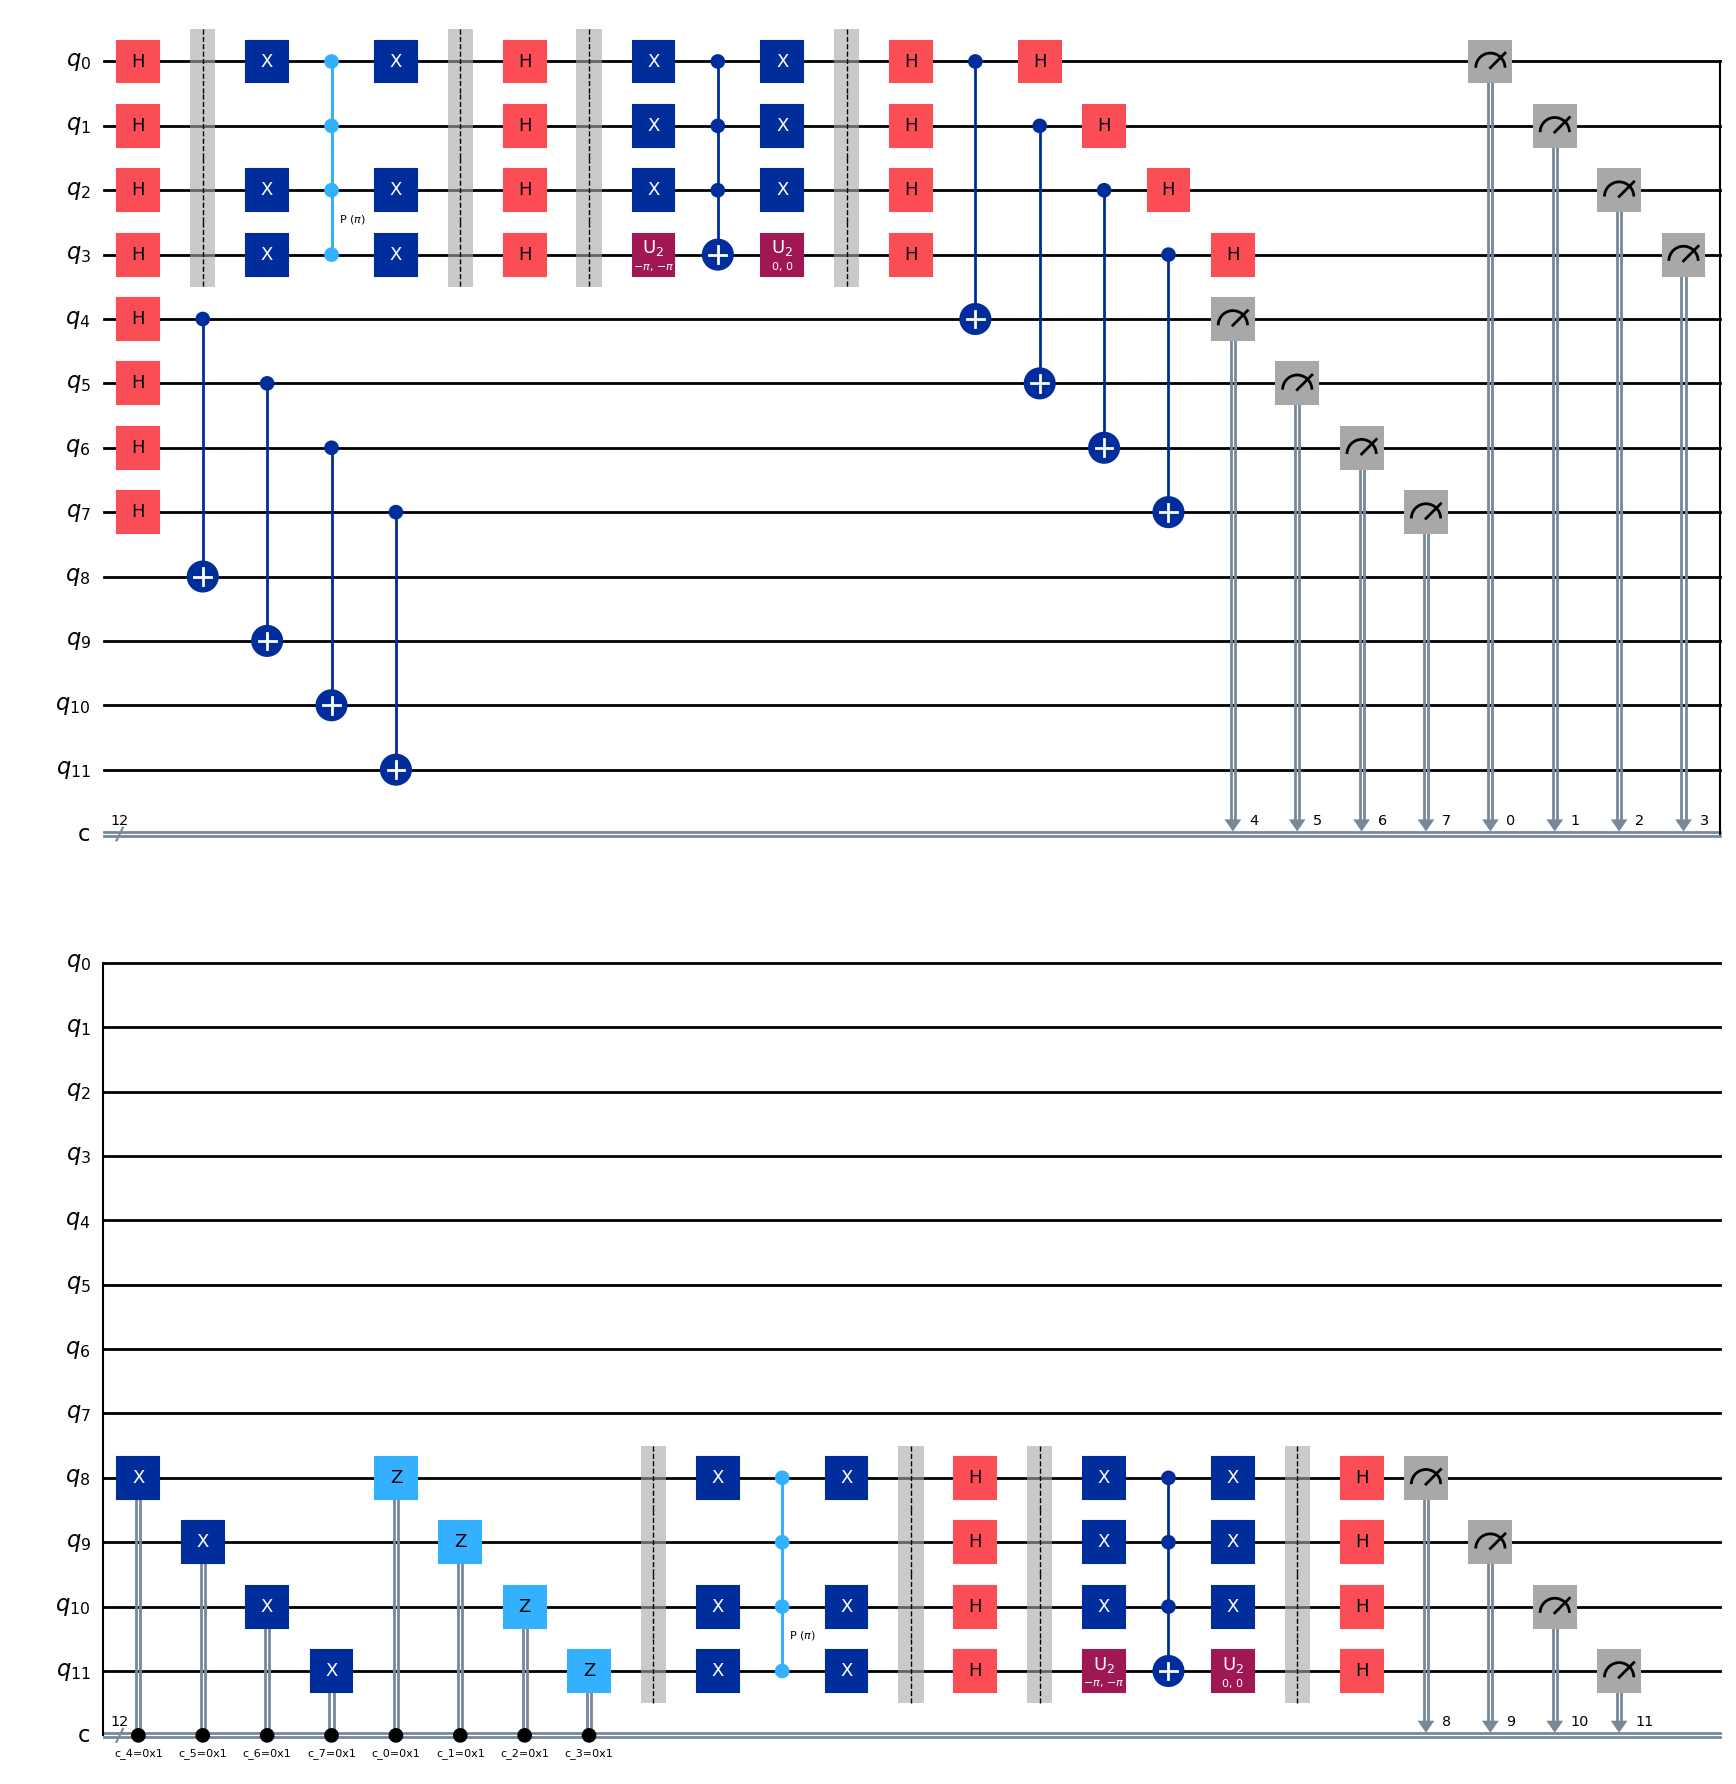

In [8]:
# Create a quantum circuit with 12 qubits and 12 classical bits
qc = QuantumCircuit(12, 12)

# Apply Hadamard gates to the first 4 qubits
qc.h(range(4))
qc.barrier(range(4))  # Add a barrier for better readability

# Define the marked state for Grover's algorithm
mark_state = QuantumCircuit(4)
mark_state.x([0, 2, 3])  # Apply X gates to qubits 0, 2, and 3
mark_state.mcp(pi, list(range(3)), 3)  # Apply a controlled phase shift
mark_state.x([0, 2, 3])  # Undo the X gates

# Create the Grover operator and append it to the first 4 qubits
grover_op = GroverOperator(mark_state, insert_barriers=True)
qc.append(grover_op, range(4))

# Initialize the simulator
simulator_aer = AerSimulator(seed_simulator=42)

# Apply Hadamard and CNOT gates for qubits 4 to 7
for i in range(4, 8):
    qc.h(i)
    qc.cx(i, i + 4)
    qc.cx(i - 4, i)
    qc.h(i - 4)
    qc.measure(i - 4, i - 4)
    qc.measure(i, i)

# Apply NOT gates for qubits 8 to 11 based on the classical bits
for i in range(8, 12):
    qc.x(i).c_if(i - 4, 1)

# Apply Z gates for qubits 8 to 11 based on the classical bits
for i in range(8, 12):
    qc.z(i).c_if(i - 8, 1)

qc.barrier(range(8, 12))  # Add a barrier for clarity

# Append the Grover operator to qubits 8 to 11
qc.append(grover_op, range(8, 12))

# Transpile the circuit for the simulator
qc = transpile(qc, backend=simulator_aer)

# Measure qubits 8 to 11 and store the result in classical bits 8 to 11
qc.measure(range(8, 12), range(8, 12))

# Display the circuit using matplotlib
qc.draw('mpl')


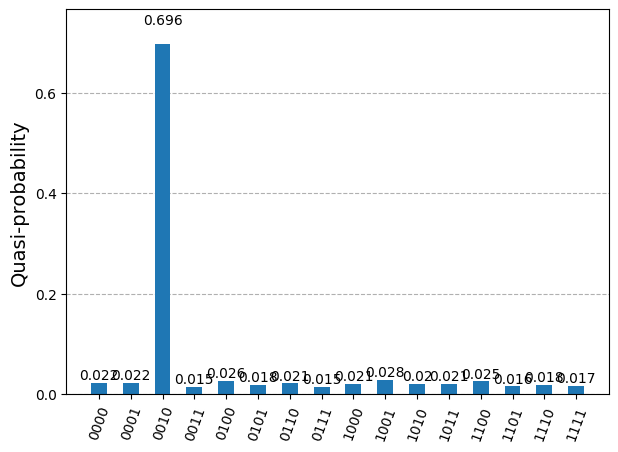

In [11]:
from qiskit_aer import noise
from qiskit.result import marginal_counts
from qiskit.visualization import plot_distribution

# Define error probabilities for different types of noise
prob_1 = 0.001  # Probability for single-qubit errors
prob_2 = 0.001  # Probability for two-qubit errors
prob_3 = 0.1    # Probability for multi-qubit errors

# Create depolarizing errors for various qubit gates
error1 = noise.depolarizing_error(prob_1, 1)  # Single-qubit error
error2 = noise.depolarizing_error(prob_2, 2)  # Two-qubit error
error3 = noise.depolarizing_error(prob_3, 4)  # Four-qubit error

# Initialize the noise model
noise_model = noise.NoiseModel()

# Add errors to the noise model for specific gate types
noise_model.add_all_qubit_quantum_error(error1, ['h', 'u2', 'x', 'z'])  # Single-qubit gates
noise_model.add_all_qubit_quantum_error(error2, ['cx'])                 # CNOT gates
noise_model.add_all_qubit_quantum_error(error3, ['mcp', 'mcx'])         # Multi-controlled gates

# Get the basis gates for the noise model
basic_gates = noise_model.basis_gates

# Run the simulation with the defined noise model
result_noisy = simulator_aer.run(qc, shots=1024, noise_model=noise_model, basis_gates=basic_gates).result()

# Get the counts of the results and compute marginal counts for specified qubits
counts = result_noisy.get_counts()
marginal_result = marginal_counts(counts, indices=[8, 9, 10, 11])

# Plot the distribution of the marginal results
plot_distribution(marginal_result)


## Step 4: The end ☕